In [72]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 1. Dataset

In [73]:
n = 1    # 한 번 sampling (Bernoulli)
mu = 0.3  # 1이 나올 확률 
N = 10000 # 시행 횟수

X = np.random.binomial(n, mu, size=N)
print(X)

print(sum(X))

[0 1 0 ... 0 1 0]
2969


## 2. Optimization (Finding Parameters)

### - In Closed Form

$\mu_{ML}={1 \over N} \sum^{N}_{n=1}x_n$ (sample mean)

In [74]:
mu_ML = np.mean(X)
print('Probability of heads :', mu_ML)

Probability of heads : 0.2969


### - By Optimizer
#### Objective Function = Log Likelihood
$\log p(X|\mu)=\sum_{n=1}^N \log p(x_n|\mu)=\sum_{n=1}^N\{x_n\log\mu+(1-x_n)\log(1-\mu)\}$

In [75]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        # shape (1), the probability of heads
        self.mu = nn.Parameter(torch.zeros(1))
        
    def _get_log_likelihood(self, mu, X, eps=1e-5):
    
        # 데이터 전체의 log-likelihood는 sum으로 계산하나 이는 데이터 갯수에 따라 달라지는 값이다.
        # 데이터 하나 당의 평균 log-likelihood를 반환하기 위해 mean으로 처리.
        return torch.mean(X * torch.log(mu+eps) + (1-X) * torch.log(1-mu+eps))    
        
    def forward(self, X):
        # X : (batch), a batch data
        
        log_likelihood = self._get_log_likelihood(self.mu, X)
        
        # return "NEGATIVE" log likelihood
        return -log_likelihood
        

## 3. Create Model and Optimizer

In [76]:
model = Model()
optimizer = torch.optim.Adam(model.parameters(), 1e-2)

print('Model and Optimizer Created')

Model and Optimizer Created


## 4. Create data tensor

In [77]:
X_tensor = torch.from_numpy(X)
print(X_tensor)

tensor([0, 1, 0,  ..., 0, 1, 0])


## 5. Train Loop

In [78]:
# model을 train mode로 설정
model.train()

loss_list = []
mu_list = []
for _ in range(10000):
    
    # model의 gradient들을 모두 0으로 설정
    model.zero_grad()
    
    # model의 forward function을 실행
    loss = model(X_tensor)
    loss_list.append(loss.item())

    # loss값을 시작으로 back-propagation 실행하여 gradient update
    loss.backward()
    # update된 gradient를 weight에 적용
    optimizer.step()
    
    mu_list.append(model.mu.item())

print('Train Finished')

Train Finished


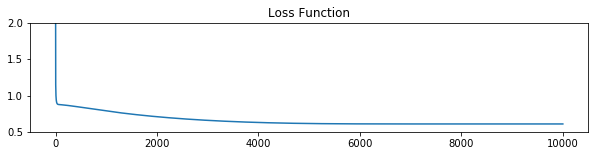

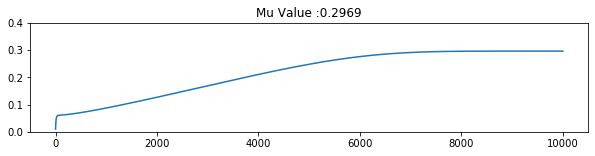

In [79]:
plt.figure(figsize=[10, 2])
plt.title('Loss Function')
plt.plot(loss_list)
plt.ylim([0.5, 2])
plt.show()

plt.figure(figsize=[10, 2])
plt.title('Mu Value :' + '%0.4f' %model.mu.item())
plt.plot(mu_list)
plt.ylim([0, 0.4])
plt.show()